## Best Streaming Service Analysis
There is a lot of competition between all the major streaming services like Netflix, Prime Video, Hulu, and Disney+. As a Data Scientist, it could be a very amazing task to find which is the best streaming service among them. 

In [107]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

The dataset contains a comprehensive list of all the TV shows which are available on the 4 platforms that we are comparing in this task.

In [108]:
# importing dataset
df = pd.read_csv('tv_shows.csv')
df.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [109]:
df.shape

(5611, 11)

Let’s prepare the dataset by dropping the duplicate values based on the title of the shows:

In [110]:
df.drop_duplicates(subset='Title', keep='first', inplace = True)

In [111]:
df.shape

(5564, 11)

Let's fill the null values in the data with zeroes and then convert them into integer data types

In [112]:
df.isnull().sum()

Unnamed: 0            0
Title                 0
Year                  0
Age                2426
IMDb               1156
Rotten Tomatoes    4560
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
type                  0
dtype: int64

In [113]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].fillna('0%')
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(lambda x: x.rstrip('%'))
df['Rotten Tomatoes'] = pd.to_numeric(df['Rotten Tomatoes'])

In [114]:
df['IMDb'] = df['IMDb'].fillna('0')
df['IMDb'] = df['IMDb']*10
df['IMDb'] = df['IMDb'].astype(int)

Visualizing the data will be easiest if we get 1s and 0s in the columns named Netflix, Hulu, Disney and Prime Video under a categorical format. There may be a chance that the same show is available in more than one platform:

In [115]:
df.columns

Index(['Unnamed: 0', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'type'],
      dtype='object')

In [116]:
df1 = df[['Title','Netflix', 'Hulu', 'Prime Video', 'Disney+']]
tv_shows_long = pd.melt(df1, id_vars=['Title'], var_name='StreamingOn', value_name='Present')
tv_shows_long.head()

,Title,StreamingOn,Present
0,Breaking Bad,Netflix,1
1,Stranger Things,Netflix,1
2,Money Heist,Netflix,1
3,Sherlock,Netflix,1
4,Better Call Saul,Netflix,1


In [117]:
tv_shows_long = tv_shows_long[tv_shows_long['Present']==1]
tv_shows_long.drop(columns='Present', inplace=True)
tv_shows_long.head()

,Title,StreamingOn
0,Breaking Bad,Netflix
1,Stranger Things,Netflix
2,Money Heist,Netflix
3,Sherlock,Netflix
4,Better Call Saul,Netflix


Now let's merge this data with the data we started with

In [118]:
tv_shows_combined = tv_shows_long.merge(df, on='Title', how='inner')

In [119]:
tv_shows_combined.head()

,Title,StreamingOn,Unnamed: 0,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,Netflix,0,2008,18+,95,96,1,0,0,0,1
1,Stranger Things,Netflix,1,2016,16+,88,93,1,0,0,0,1
2,Money Heist,Netflix,2,2017,18+,84,91,1,0,0,0,1
3,Sherlock,Netflix,3,2010,16+,91,78,1,0,0,0,1
4,Better Call Saul,Netflix,4,2015,18+,87,97,1,0,0,0,1


Droping some unwanted columns:

In [120]:
tv_shows_combined.drop(columns=['Unnamed: 0','Netflix', 'Hulu', 'Prime Video', 'Disney+', 'type'], inplace=True)

In [121]:
tv_shows_combined.head()

,Title,StreamingOn,Year,Age,IMDb,Rotten Tomatoes
0,Breaking Bad,Netflix,2008,18+,95,96
1,Stranger Things,Netflix,2016,16+,88,93
2,Money Heist,Netflix,2017,18+,84,91
3,Sherlock,Netflix,2010,16+,91,78
4,Better Call Saul,Netflix,2015,18+,87,97


In [122]:
tv_shows_combined.groupby('StreamingOn').count()

,Title,Year,Age,IMDb,Rotten Tomatoes
StreamingOn,,,,,
Disney+,178,178,149,178,178
Hulu,1729,1729,1261,1729,1729
Netflix,1925,1925,1228,1925,1925
Prime Video,2126,2126,799,2126,2126


In [123]:
tv_shows_combined.groupby('StreamingOn').Title.count()

StreamingOn
Disney+         178
Hulu           1729
Netflix        1925
Prime Video    2126
Name: Title, dtype: int64

<AxesSubplot:xlabel='StreamingOn'>

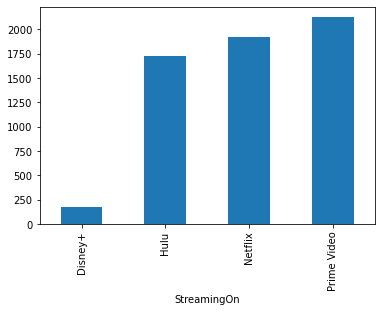

In [124]:
tv_shows_combined.groupby('StreamingOn').Title.count().plot(kind='bar')

By using the bar plot, we can observe that Amazon prime had a great quantity of content

Now let’s use a scatter plot to compare the ratings between IMBD and Rotten Tomatoes to compare which streaming platform has the best ratings in both the user rating platforms:

In [125]:
import plotly.express as px
tv_shows_both_ratings = tv_shows_combined[(tv_shows_combined.IMDb > 0) & tv_shows_combined['Rotten Tomatoes'] > 0]

In [126]:
px.scatter(tv_shows_both_ratings, x='IMDb', y='Rotten Tomatoes', color='StreamingOn')

Using the scatter plot we can observe that it is quite obvious that Amazon Prime performs very well in the fourth quadrant. Even by using the bar plot, we can observe that Amazon prime had a great quantity of content. So looking at all the streaming platforms we can conclude that Amazon Prime is better in both quality and quantity.